In [6]:
#!/bin/bash
!kaggle datasets download refiaozturk/online-shopping-dataset

Dataset URL: https://www.kaggle.com/datasets/refiaozturk/online-shopping-dataset
License(s): CC-BY-NC-SA-4.0
  0% 0.00/177k [00:00<?, ?B/s]
100% 177k/177k [00:00<00:00, 59.7MB/s]


In [8]:
from zipfile import ZipFile
with ZipFile('/content/online-shopping-dataset.zip', 'r') as zipObj:
   zipObj.extractall()

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
data = pd.read_csv('/content/dataset.csv')
data.head()

,User ID,Age,Gender,Country,Purchase Amount,Purchase Date,Product Category
0,1,56.0,Female,USA,331.79,2021-11-21,Sports
1,2,69.0,Male,Australia,335.72,2022-03-05,Home & Kitchen
2,3,46.0,NaN,Germany,493.18,NaN,Books
3,4,32.0,Male,Germany,80.97,2023-06-08,Sports
4,5,60.0,Female,UK,21.75,NaN,Beauty


In [10]:
data.describe()

,User ID,Age,Purchase Amount
count,15000.000000,13500.000000,13200.000000
mean,7500.500000,43.396000,253.217720
std,4330.271354,14.927082,143.113919
min,1.000000,18.000000,5.050000
25%,3750.750000,31.000000,130.335000
50%,7500.500000,43.000000,253.645000
75%,11250.250000,56.000000,378.585000
max,15000.000000,69.000000,499.950000


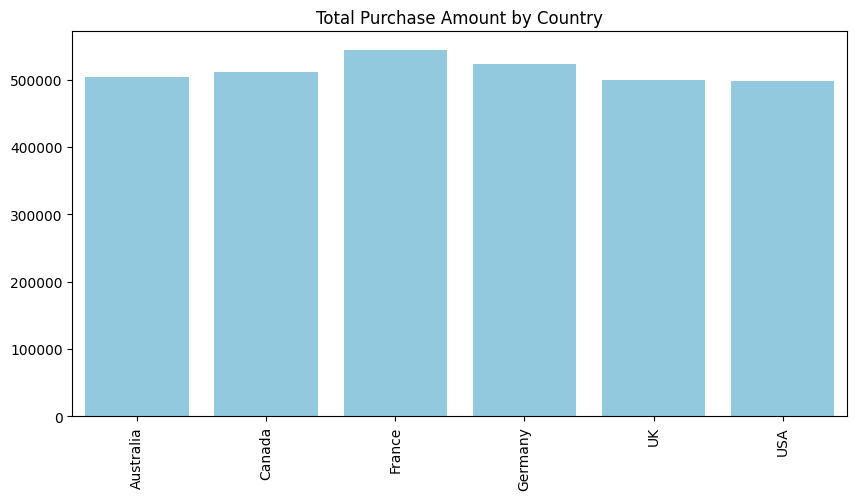

In [25]:
purchase_data = dict(data.groupby(['Country'])['Purchase Amount'].sum())
plt.figure(figsize=(10, 5))
plt.title('Total Purchase Amount by Country')
sns.barplot(x = list(purchase_data.keys()), y = list(purchase_data.values()), color='skyblue')
plt.xticks(rotation=90)
plt.show()

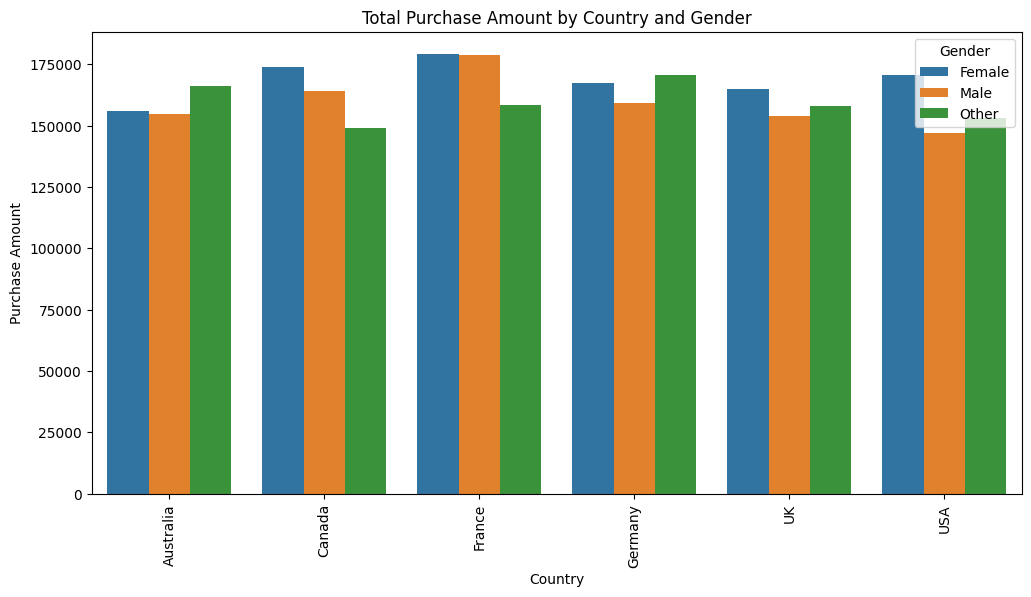

In [23]:
grouped_data = data.groupby(['Country','Gender'])['Purchase Amount'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='Purchase Amount', hue='Gender', data=grouped_data)
plt.title('Total Purchase Amount by Country and Gender')
plt.xticks(rotation=90)
plt.show()

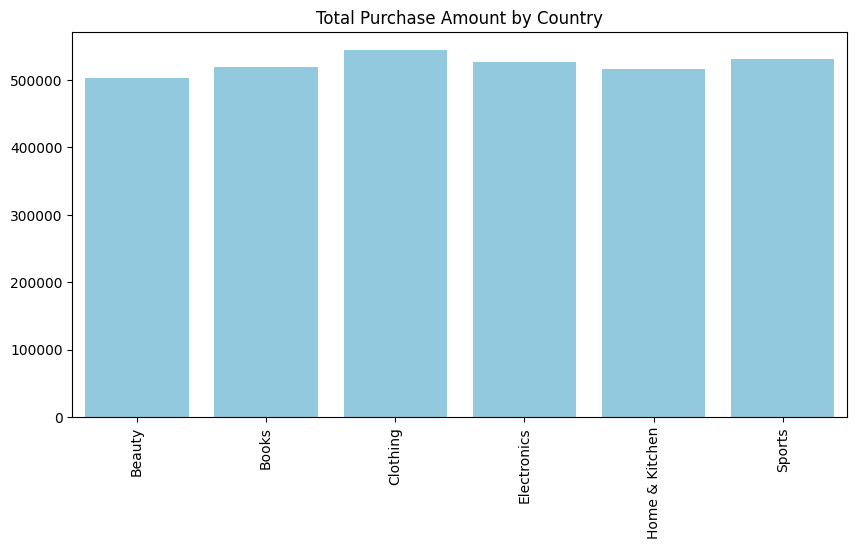

In [26]:
purchase_data = dict(data.groupby(['Product Category'])['Purchase Amount'].sum())
plt.figure(figsize=(10, 5))
plt.title('Total Purchase Amount by Product')
sns.barplot(x = list(purchase_data.keys()), y = list(purchase_data.values()), color='skyblue')
plt.xticks(rotation=90)
plt.show()

<ipython-input-40-5c8ba06d1dc9>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_purchase_data = data.groupby(['Age Group'])['Purchase Amount'].sum()


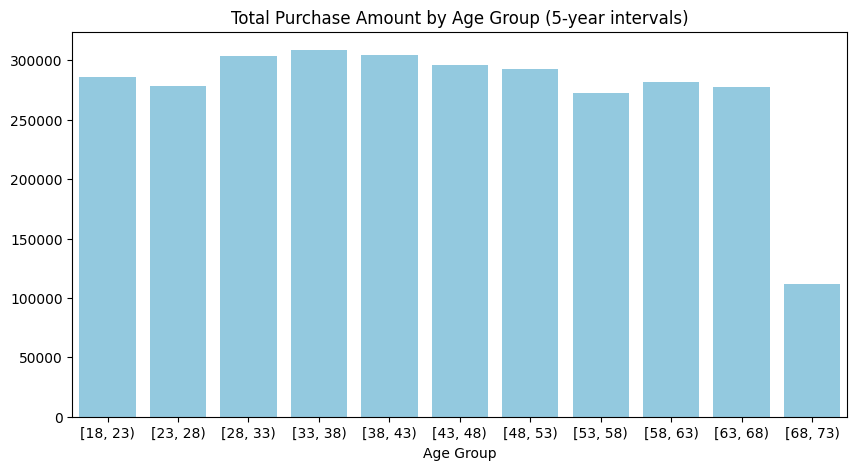

In [40]:
age_min = int(data['Age'].min())
age_max = int(data['Age'].max())
bins = range(age_min, age_max + 5, 5)

data['Age Group'] = pd.cut(data['Age'], bins=bins, right=False)

age_purchase_data = data.groupby(['Age Group'])['Purchase Amount'].sum()


plt.figure(figsize=(10, 5))
plt.title('Total Purchase Amount by Age Group (5-year intervals)')
sns.barplot(x=age_purchase_data.index.astype(str), y=age_purchase_data.values, color='skyblue')
plt.show()